In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
palette = sns.color_palette(['#5494da', '#5dcdf9', '#e8e37c', '#f3b595', '#f09895'])


In [ ]:
df = pd.read_csv('../data.csv')

In [ ]:
df.head()

In [ ]:
def plot_time_vs_thread(df_):
    df = df_.copy()
    df = df.loc[df['n'] == 10000000]
    threads = sorted(list(set(df['thread'])))
    algos = list(set(df['name']))
    trimmers = []
    for algo in algos:
        t_trimmers = []
        for thread in threads:
            element_df = df.loc[df['name'] == algo].loc[df['thread'] == thread]
            assert len(element_df) == 3
            time = sum(element_df['time'].to_numpy())
            t_trimmers.append({'name':algo, 'n':10000000, 'thread':thread, 'time':time, 'speedup':(1/time)})
        for row in t_trimmers:
            row['speedup'] *= t_trimmers[0]['time']
        trimmers += t_trimmers
    df_trim = pd.DataFrame(trimmers)
    df_trim['name'] = df_trim['name'].map({'priority':'DPC-PRIORITY', 'fenwick':'DPC-FENWICK', 'static':'DPC-INCOMPLETE', 'orig':'DPC-EXACT-BASELINE', 'approx':'DPC-APPROX-BASELINE'})
    
    fontsize = 20
    fig = plt.figure(figsize=(3.5, 4))
    g = sns.lineplot(data=df_trim, x='thread', y='speedup', hue='name', palette=palette, style="name", markers=True, dashes=False, linewidth=4, markersize=15)
    g.set(xscale="log", yscale="log")
    plt.ylabel("Speedup Ratio", fontsize = fontsize+5)
    plt.xlabel("# Thread", fontsize = fontsize+5)
    g.set_xticks([1, 2, 4, 8, 16, 30, 60])
    g.set_xticklabels([1, 2, 4, 8, 16, 30, 60])
    g.set_yticks([1, 2, 4, 8, 16])
    g.set_yticklabels([1, 2, 4, 8, 16])
    sns.despine()
    
    for l in g.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in g.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles, labels, loc=10, ncol=1,bbox_to_anchor=(-0.9, 0.5),frameon=False, fontsize = fontsize)
    plt.legend([],[], frameon=False)
    plt.subplots_adjust(left=0.03,right=0.995, top=0.85,wspace=0.1, hspace = 0.25)

    plt.savefig('../images/time_vs_thread.pdf', bbox_inches='tight' )
plot_time_vs_thread(df)

In [ ]:
def plot_time_vs_n(df_):
    df = df_.copy()
    df = df.loc[df['thread'] == 60]
    ns = sorted(list(set(df['n'])))
    algos = list(set(df['name']))
    trimmers = []
    for algo in algos:
        t_trimmers = []
        for n in ns:
            element_df = df.loc[df['name'] == algo].loc[df['n'] == n]
            assert len(element_df) == 3
            time = sum(element_df['time'].to_numpy())
            t_trimmers.append({'name':algo, 'n':n, 'thread':60, 'time':time, 'speedup':(1/time)})
        for row in t_trimmers:
            row['speedup'] *= t_trimmers[0]['time']
        trimmers += t_trimmers
    df_trim = pd.DataFrame(trimmers)
    df_trim['name'] = df_trim['name'].map({'priority':'EDPC-PRIORITY', 'fenwick':'CDPC-FENWICK', 'static':'DDPC-INCOMPLETE', 'orig':'ADPC-EXACT-BASELINE', 'approx':'BDPC-APPROX-BASELINE'})
    df_trim = df_trim.sort_values(by=['name'], ascending=True)
    df_trim['name'] = df_trim['name'].apply(lambda x : x[1:])
    fontsize = 20
    fig = plt.figure(figsize=(3.5, 4))
    markers = {"DPC-PRIORITY": "s", "DPC-INCOMPLETE": "D", "DPC-FENWICK": "P", "DPC-EXACT-BASELINE": "o", "DPC-APPROX-BASELINE": "X"}
    g = sns.lineplot(data=df_trim, x='n', y='time', hue='name', palette=palette, style="name", markers=markers, dashes=False, linewidth=4, markersize=15)
    g.set(xscale="log", yscale="log")
    plt.ylabel("Runtime (s)", fontsize = fontsize+5)
    plt.xlabel("Size of data set", fontsize = fontsize+5)
    #g.set_xticks([1, 2, 4, 8, 16, 30, 60])
    #g.set_xticklabels([1, 2, 4, 8, 16, 30, 60])
    #g.set_yticks([1, 2, 4, 8, 16])
    #g.set_yticklabels([1, 2, 4, 8, 16])
    sns.despine()
    
    for l in g.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in g.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    
    handles, labels = g.get_legend_handles_labels()
    order = [0,1,2,3,4]
    handles, labels = [handles[idx] for idx in order],[labels[idx] for idx in order]
    leg = g.legend(handles, labels, loc=9, ncol=3,bbox_to_anchor=(0.5, 1.4),frameon=False, fontsize = fontsize, markerscale=3.3)
    for line in leg.get_lines():
        line.set_linewidth(4.0)
    #plt.legend([],[], frameon=False)
    plt.subplots_adjust(left=0.03,right=0.995, top=0.85,wspace=0.1, hspace = 0.25)

    plt.savefig('../images/legend.pdf', bbox_inches='tight' )
plot_time_vs_n(df)

In [16]:
df = pd.read_csv('../data_r_dep_only.csv')
df_density = pd.read_csv('../data_density.csv')
print(set(df['data']))

{'Sensor5', 'simden', 'PAMAP2', 'Gowalla', 'HT', 'GeoLife', 'Query', 'varden', 'uniform'}


GeoLife
[0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.0, 1.28, 2.56, 5.12, 10.24, 20.48]
{0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24, 0.01, 0.04, 20.48, 0.02}
PAMAP2
[0.02, 0.5, 0.75, 1.125, 1.6875, 2.53, 3.8, 5.7]
{0.5, 0.75, 2.53, 1.125, 1.6875, 3.8, 5.7}
Sensor5
[0.003, 0.006, 0.012, 0.024, 0.048, 0.096, 0.192, 0.2, 0.384, 0.768]
{0.048, 0.096, 0.192, 0.384, 0.768, 0.012, 0.024, 0.006, 0.003}
HT
[0.3, 0.5, 0.6, 1.2, 2.4, 4.8]
{0.3, 0.6, 2.4, 1.2, 4.8}
Query
[0.008, 0.01, 0.012, 0.018, 0.027, 0.0405, 0.081]
{0.081, 0.027, 0.012, 0.008, 0.0405, 0.018}
Gowalla
[0.03, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6]
{0.05, 0.4, 0.1, 0.8, 0.2, 1.6, 3.2, 6.4, 12.8, 25.6}
{'Sensor5', 'simden', 'PAMAP2', 'Gowalla', 'HT', 'GeoLife', 'Query', 'varden', 'uniform'}


/tmp/ipykernel_20375/746135566.py:43: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  g = sns.lineplot(data=df_trim, x='percent', y='time', hue='data', palette=palette, style="data", dashes=False, linewidth=4, markersize=15)


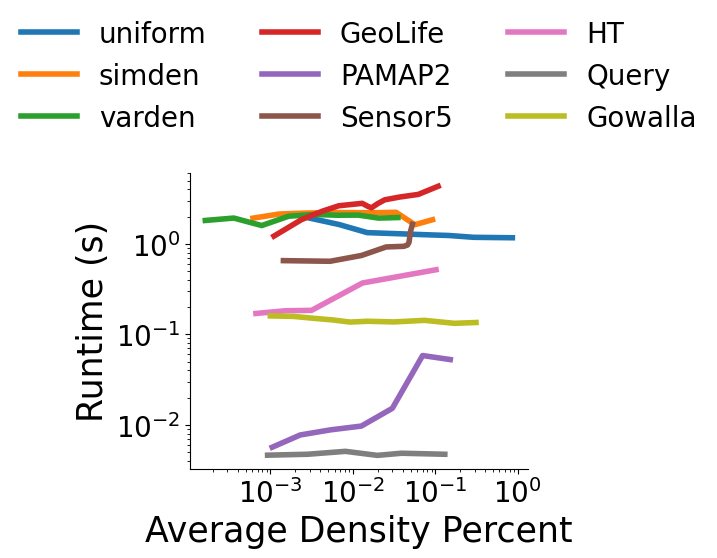

In [17]:
palette = sns.color_palette()
def plot_time_vs_r(df_, df_density_):
    df = df_.copy()
    df = df.loc[df['thread'] == 60]
    df_density = df_density_.copy()
    
    algo = 'priority'
    df = df.loc[df['name']==algo]
    data_names = ['uniform', 'simden', 'varden', 'GeoLife', 'PAMAP2', 'Sensor5', 'HT', 'Query', 'Gowalla']
    new_df_list = []
    for data_name in data_names:
        tiny_df = df.loc[df['data'] == data_name]
        tiny_df_density = df_density.loc[df_density['data'] == data_name]
        tiny_df_density = tiny_df_density.sort_values(by='r', ascending=True)
        rs = sorted(list(set(tiny_df['r'])))
        r2percent = {}
        if data_name in ['uniform', 'simden', 'varden']:
            for i, r in enumerate(rs):
                r2percent[r] = tiny_df_density['percent'].to_numpy()[i]
        else:
            density_rs = set(tiny_df_density['r'])
            print(data_name)
            print(rs)
            print(density_rs)
            for r in rs:
                if r not in density_rs:
                    r2percent[r] = -1
                else:
                    r2percent[r] = tiny_df_density.loc[tiny_df_density['r'] == r]['percent'].to_numpy()[0]
        for r in rs:
            time = (tiny_df.loc[tiny_df['r'] == r])['time'].to_numpy()[0]
            percent = r2percent[r]
            if percent == -1:
                continue
            new_df_list.append({'data': data_name, 'r': r, 'time': time, 'percent': percent})
    
    df_trim = pd.DataFrame.from_records(new_df_list)
    print(set(df_trim['data']))

    fontsize = 20
    fig = plt.figure(figsize=(3.5, 4))
    #markers = {"uniform": "s", "DPC-INCOMPLETE": "D", "DPC-FENWICK": "P", "DPC-EXACT-BASELINE": "o", "DPC-APPROX-BASELINE": "X"}
    g = sns.lineplot(data=df_trim, x='percent', y='time', hue='data', palette=palette, style="data", dashes=False, linewidth=4, markersize=15)
    g.set(xscale="log", yscale="log")
    plt.ylabel("Runtime (s)", fontsize = fontsize+5)
    plt.xlabel("Average Density Percent", fontsize = fontsize+5)
    #g.set_xticks([1, 2, 4, 8, 16, 30, 60])
    #g.set_xticklabels([1, 2, 4, 8, 16, 30, 60])
    #g.set_yticks([1, 2, 4, 8, 16])
    #g.set_yticklabels([1, 2, 4, 8, 16])
    sns.despine()
    
    for l in g.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in g.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    
    handles, labels = g.get_legend_handles_labels()
    #order = [0,1,2,3,4]
    #handles, labels = [handles[idx] for idx in order],[labels[idx] for idx in order]
    leg = g.legend(handles, labels, loc=9, ncol=3,bbox_to_anchor=(0.5, 1.6),frameon=False, fontsize = fontsize, markerscale=3.3)
    for line in leg.get_lines():
        line.set_linewidth(4.0)
    #plt.legend([],[], frameon=False)
    plt.subplots_adjust(left=0.03,right=0.995, top=0.85,wspace=0.1, hspace = 0.25)

    plt.savefig('../images/r_time_dep_only.pdf', bbox_inches='tight' )
plot_time_vs_r(df, df_density)